# Exercise 2 - Text Analysis

Author: Khushee Kapoor

Week: 7

Last Updated: 4/1/22

To start, we import the following packages:

-   NumPy: for data manipulation
-   Pandas: for data manipulation
-   MatPlotLib: for data visualization
-   Seaborn: for data visualization

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Next, we read the dataset. To do this, we use the read_csv() function from the Pandas library.

In [2]:
# reading the dataset
df = pd.read_csv('D:/khushee/Documents/Manipal/Study/Year 2/Data Analytics/Lab/amazon_baby.csv/amazon_baby.csv')

After that, we view the first few rows of the dataset using the head() function from the Pandas library.

In [3]:
# viewing the first few rows
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


#### *Q12.*  Check the number of the reviews received for each product.

To solve Question 12, we use the value_counts() function from the Pandas library on the name column in the dataframe.

In [4]:
# checking for number of reviews received by each product
df.name.value_counts()

Vulli Sophie the Giraffe Teether                                                                                                                                                                              785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                                                                                                                                           562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                                                                                                                                      561
Baby Einstein Take Along Tunes                                                                                                                                                                                547
Cloud b Twilight Constellation Night Light, Turtle                                                                                                              

As we can see, there are 32415 items in the dataset and Vulli Sophie the Giraffe Teether has the highest reviews, and Bloom Universal Snug, Coconut White has the lowest reviews.

#### *Q13.* Check the products that have more than 15 reviews.

To solve Question 13, we use the value_counts() function from the Pandas library on the name column in the dataframe and then use the loc() and lambda functions to extract all those items having more than 15 reviews.

In [5]:
# checking for products that recieved more than 15 reviews
df.name.value_counts().loc[lambda x : x > 15]

Vulli Sophie the Giraffe Teether                                            785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                         562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision    561
Baby Einstein Take Along Tunes                                              547
Cloud b Twilight Constellation Night Light, Turtle                          520
                                                                           ... 
Bumkins Cloth Diaper Cover, Pink Gazebo, One Size                            16
Kushies Washable Pre-folded Diapers, White                                   16
Foogo by Thermos Leak-Proof SS 12 oz Straw Bottle in Blue                    16
Sassy Sensation Station Suction Toy                                          16
Baby Einstein Discovering Music Activity Table                               16
Name: name, Length: 2339, dtype: int64

As we can see, the number of items has drastically reduced and there are only 2339 products now.

#### *Q14.* Find any missing review are present or not, If present remove those data.

To solve Question 14, we use the isnull() function from the Pandas library and then sum over them using the sum() function.

In [6]:
# checking for missing values
df.isnull().sum()

name      318
review    829
rating      0
dtype: int64

As we can see, there are 829 missing values in the review column. To remove them, we filter the dataframe by using the notna() function from the Pandas library on the review column.

In [7]:
# removing the entries with missing reviews
df = df[df.review.notna()]

#### *Q15.* Clean the data and remove the special characters and replace the contractions with its expansion by converting the uppercase character to lower case. Also, remove the punctuations.

To solve Question 15, we first create a dictionary with all the contractions and their expansions. 

In [8]:
# creating a dictionary with contractions and their expansions
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

Next, we create a custom made function to convert the contractions to expansions. This function loops over the previously created dictionary and uses the replace() function from the string library to replace the contractions with the expansions.

In [9]:
# custom made function to convert contraction to expansion
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

After that, we apply the function on every observation in the review column. To do that, we use the apply() function from the Pandas library and the lambda function.

In [10]:
# converting contraction to expansion in every row of the review column
df['review'] = df['review'].apply(lambda x:cont_to_exp(x))

Next, we create a custom made function to convert upper case to lower case. This function implements the lower() function from the string package.

In [11]:
# custom made function to convert upper case to lower
def upper_to_lower(x):
    if type(x) is str:
        return x.lower()
    else:
        return x

After that, we apply the function on every observation in the review column. To do that, we use the apply() function from the Pandas library and the lambda function.

In [12]:
# converting upper case to lower from every row of the review column
df['review'] = df['review'].apply(lambda x:upper_to_lower(x))

Next, we create a custom made function to remove the punctuations. This function loops over every punctutation in the string.punctuation constant from the string library and use the replace() function to replace them with blanks.

In [13]:
# custom made function to remove punctuations
import string
def remove_punctuations(text):
    if type(text) is str:
        for p in string.punctuation:
            text = text.replace(p, '')
        return text
    else:
        return text    

After that, we apply the function on every observation in the review column. To do that, we use the apply() function from the Pandas library and the lambda function.

In [14]:
# removing punctuations from every row of the review column
df['review'] = df['review'].apply(lambda x:remove_punctuations(x))

Next, we create a custom made function to remove the special characters. This function loops over every character from a custom made string containing all special characters and use the replace() function to replace them with blanks.

In [15]:
# custom made function to remove special characters
def remove_special_chars(text):
    special_chars = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    if type(text) is str:
        for p in special_chars:
            text = text.replace(p, '')
        return text
    else:
        return text

After that, we apply the function on every observation in the review column. To do that, we use the apply() function from the Pandas library and the lambda function.

In [16]:
# removing special characters from every row of the review column
df['review'] = df['review'].apply(lambda x:remove_special_chars(x))

#### *Q16.* Add the Polarity, length of the review, the word count and average word length of each review.

To solve Question 16, we first import the textblob package.

In [17]:
# importing the text blob package
from textblob import TextBlob

Next, we create three new columns,

-   polarity: to store polarity by using the sentiment.polarity parameter of the TextBlob function and lambda function
-   review_len: to store review length by using the len() and lambda functions
-   word_count: to store word count by using the len(), split() and lambda functions

In [18]:
# polarity column
df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# review length column
df['review_len'] = df['review'].apply(lambda x:len(x))

# word count column
df['word_count'] = df['review'].apply(lambda x: len(x.split()))

Following that, we create a custom made function to calculate the average word length. This function divided the total length of all the words combined by the total number of words in every entry.

In [19]:
# custom made function to calculate and return average word length
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words) 

After that, we apply the function on every observation in the review column. To do that, we use the apply() function from the Pandas library and the lambda function.

In [20]:
# calculating average word length of every review
df['avg_word_len'] = df['review'].apply(lambda x: get_avg_word_len(x))

#### *Q17.* Visualize the distribution of the word count, review length, and polarity.

To solve Question 17, we use the hist() function from the Pandas library and matplotlib aesthetic functions to plot histograms for every column.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

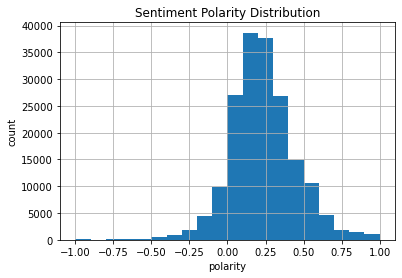

In [21]:
# histogram for polarity
df['polarity'].hist(bins=20)
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('Sentiment Polarity Distribution')

As we can see, the distribution of polarity is more or less normal, may be slightly left skewed.

Text(0.5, 1.0, 'Review Text Length Distribution')

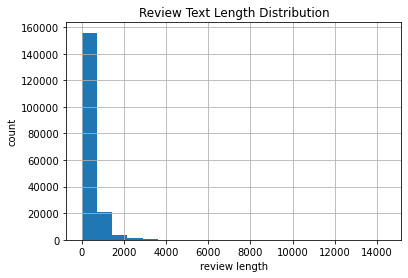

In [22]:
# histogram for review length
df['review_len'].hist(bins=20)
plt.xlabel('review length')
plt.ylabel('count')
plt.title('Review Text Length Distribution')

As we can see, the distribution of review length is highly right skewed. 

Text(0.5, 1.0, 'Word Count Distribution')

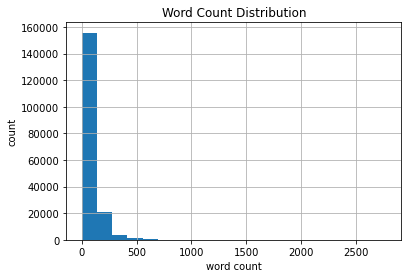

In [23]:
# histogram for word count
df['word_count'].hist(bins=20)
plt.xlabel('word count')
plt.ylabel('count')
plt.title('Word Count Distribution')

As we can see, the distribution of word count is highly right skewed.

#### *Q18.* Visualize polarity considering the rating.

To solve Question 18, we use the groupby() function to group the dataframe based on rating, the aggregate() function on the polarity column of the grouped dataframe to aggregate the polarity based on mean, calculated using np.mean, and then the plot() function to plot a line chart of polarity considering rating. All these functions are from the Pandas library. We also use matplotlib aesthetic functions to enhance the readability of the plot.

Text(0.5, 1.0, 'Polarity considering Rating')

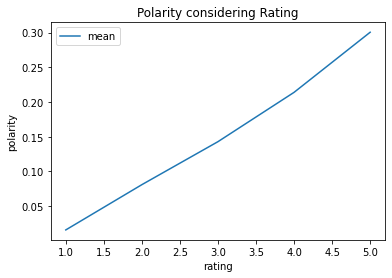

In [24]:
# line chart for polarity considering rating
df.groupby(by='rating').polarity.agg([np.mean]).plot()
plt.xlabel('rating')
plt.ylabel('polarity')
plt.title('Polarity considering Rating')

As we can see, as the rating increases, the polarity also increases positively.

#### *Q19.* Visualize the count of the reviews of each rating available in the dataset.

To sovle Question 19, we use the groupby() function from the Pandas library to group the dataset by rating, then we use the count() function to count the number of reviews received by each rating, and finally we use the plot.bar() function from the Pandas library to plot a barplot to display the number of reviews received by each rating. We also use matplotlib aesthetic functions to enhance the readability of the graph.

Text(0.5, 1.0, 'count of the reviews of each rating')

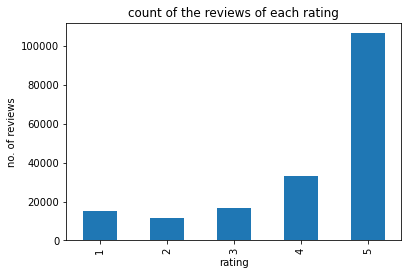

In [25]:
# barplot for count of reviews for each rating
df.groupby(by='rating').review.count().plot.bar()
plt.xlabel('rating')
plt.ylabel('no. of reviews')
plt.title('count of the reviews of each rating')

As we can see, the highest rating has received the highest number of recviews, followed by rating 4, rating 3, rating 1, and rating 2. 

#### *Q20.* List the Top 20 products based on the polarity.

To solve Question 20, we use the sort_values() function from the Pandas library, and set the parameters by to polarity and ascending to False to sort the dataframe by the polarity column in the descening order. Then we splice the resultant dataset to obtain the top 20 values.

In [26]:
# obtaining top 20 products based on polarity
df.sort_values(by='polarity')[0:20]

,name,polarity,rating
62514,"Lambs and Ivy Luv Bugs Musical Mobile, Plum",1.0,5
125902,Dream On Me 4&quot; Full Size Foam Crib and To...,1.0,5
175206,"NurSit Basic Nursing Pillow, Dots Print",1.0,5
28506,HALO SleepSack Big Kids Micro-Fleece Wearable ...,1.0,5
28475,Graco Pack \'n Play Theresa,1.0,5
125611,Dr. Brown\'s 2 Pack Natural Flow Y-Cut Standar...,1.0,5
125646,timi &amp; leslie Annette 7-Piece Diaper Bag S...,1.0,5
1213,Thomas &amp; Friends - 3 Piece Dinnerware Set-...,1.0,5
148628,"Munchkin Time Saver Bottle Warmer, White",1.0,1
183124,Evenflo JourneyLite Travel System with Embrace...,1.0,5


#### *Q21.* Visualize to check whether the review length changes with rating.

To solve Question 21, we use the barplot() function from the Seaborn library, and plot the rating column on the x-axis and review length on the y-axis. We also use aesthetic functions from the matplotlib library to make the plot more readable.

Text(0.5, 1.0, 'Review Length vs Rating')

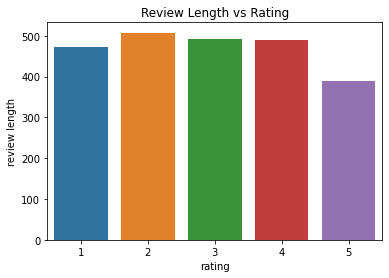

In [27]:
# checking for change in review length
sns.barplot(x='rating', y='review_len', data=df, ci=None)
plt.xlabel('rating')
plt.ylabel('review length')
plt.title('Review Length vs Rating')

As we can see, except rating 5, the review length for ratings 1, 2, 3 and 4 is more or less the same, and the review length for rating 5 is significantly lesser than the other ratings.

#### *Q22* Visualize the distribution of Top 25 Unigram, Bigram and Trigram.

To solve Question 22, we first import the CountVectorizer module from the sklearn library.

In [28]:
# importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

To visualize the distribution of unigrams, we create a custom made function to get the top n unigrams/ words. This function uses CountVectorizer to generate unigrams from the review after removing the stop words, calculates the frequency of each unigram, then splices and returns the top n unigrams and their frequency sorted in the descending order based on frequency.

In [29]:
# custom made function to return the top n unigrams
def get_top_n_words(x, n=25):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

After that, we call the previously created function and pass the review column and specify n to be 25, and store the returned value in a variable.

In [30]:
# calling function and storing result in a variable
common_words = get_top_n_words(df['review'], 25)
common_words

[('baby', 79604),
 ('great', 59536),
 ('just', 56542),
 ('use', 53037),
 ('like', 51662),
 ('love', 43866),
 ('seat', 43752),
 ('little', 41617),
 ('easy', 41216),
 ('old', 39427),
 ('does', 36703),
 ('really', 35010),
 ('product', 34083),
 ('time', 33455),
 ('did', 32212),
 ('son', 32197),
 ('bought', 31693),
 ('good', 29706),
 ('daughter', 27652),
 ('stroller', 26297),
 ('months', 26117),
 ('used', 23810),
 ('car', 23673),
 ('loves', 22348),
 ('recommend', 20737)]

As we can see, we have received a list of tuples containing the top 25 unigrams and their frequencies.

Next, we create a dataframe of the returned list using the DataFrame() function from the Pandas library and set the index to be the Unigrams to make our further analysis easier.

In [31]:
# creating a dataframe from the returned list
df1 = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])

# setting index to be unigrams
df1.set_index('Unigram Text', drop=True, inplace=True)

After that, we use the plot.bar() function from the Pandas library to plot a barplot of the unigrams and their frequencies. We also use matplotlib aesthetic functions to enhance the readability of the chart.

Text(0.5, 1.0, 'Unigrams Count')

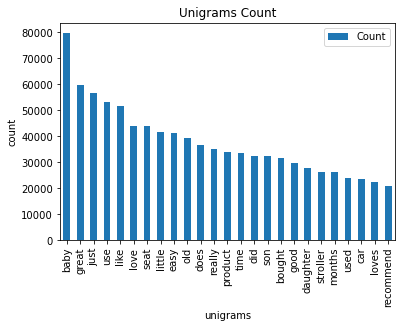

In [32]:
# barplot to represent the frequency of unigrams
df1.plot.bar()
plt.xlabel('unigrams')
plt.ylabel('count')
plt.title('Unigrams Count')

As we can see, the word 'baby' has the highest freqency in all the reviews.

To visualize the distribution of bigrams, we create a custom made function to get the top n bigrams. This function uses CountVectorizer to generate bigrams from the review after removing the stop words, calculates the frequency of each bigram, then splices and returns the top n bigrams and their frequency sorted in the descending order based on frequency.

In [33]:
# custom made function to return the top n bigrams
def get_top_n_bigram(x, n=25):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

After that, we call the previously created function and pass the review column and specify n to be 25, and store the returned value in a variable.

In [34]:
# calling function and storing result in a variable
common_words = get_top_n_bigram(df['review'], 25)
common_words

[('car seat', 12432),
 ('month old', 12227),
 ('year old', 10205),
 ('months old', 6895),
 ('highly recommend', 6031),
 ('diaper bag', 5056),
 ('easy clean', 5018),
 ('easy use', 4766),
 ('works great', 3881),
 ('great product', 3806),
 ('really like', 2976),
 ('make sure', 2941),
 ('son loves', 2937),
 ('daughter loves', 2844),
 ('high chair', 2825),
 ('easy install', 2758),
 ('old son', 2733),
 ('good quality', 2497),
 ('recommend product', 2443),
 ('old daughter', 2319),
 ('baby shower', 2298),
 ('customer service', 2265),
 ('definitely recommend', 2234),
 ('old loves', 2129),
 ('pack play', 2016)]

As we can see, we have received a list of tuples containing the top 25 bigrams and their frequencies.

Next, we create a dataframe of the returned list using the DataFrame() function from the Pandas library and set the index to be the Bigrams to make our further analysis easier.

In [35]:
# creating a dataframe from the returned list
df2 = pd.DataFrame(common_words, columns = ['Bigram Text' , 'Count'])

# setting index to be bigrams
df2.set_index('Bigram Text', drop=True, inplace=True)

After that, we use the plot.bar() function from the Pandas library to plot a barplot of the bigrams and their frequencies. We also use matplotlib aesthetic functions to enhance the readability of the chart.

Text(0.5, 1.0, 'Bigrams Count')

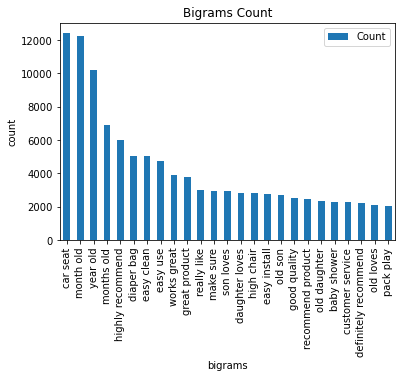

In [36]:
# barplot to represent the frequency of bigrams
df2.plot.bar()
plt.xlabel('bigrams')
plt.ylabel('count')
plt.title('Bigrams Count')

As we can see, the bigram 'car seat' has the highest frequency, and is closely followed by 'month old'.

To visualize the distribution of trigrams, we create a custom made function to get the top n trigrams. This function uses CountVectorizer to generate trigrams from the review after removing the stop words, calculates the frequency of each trigram, then splices and returns the top n trigrams and their frequency sorted in the descending order based on frequency.

In [37]:
# custom made function to return the top n trigrams
def get_top_n_trigram(x, n=25):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words="english").fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

After that, we call the previously created function and pass the review column and specify n to be 25, and store the returned value in a variable.

In [38]:
# calling function and storing result in a variable
common_words = get_top_n_trigram(df['review'], 25)
common_words

[('month old son', 1430),
 ('month old daughter', 1166),
 ('son months old', 892),
 ('month old loves', 873),
 ('year old son', 837),
 ('baby shower gift', 820),
 ('highly recommend product', 779),
 ('year old daughter', 773),
 ('love love love', 708),
 ('daughter months old', 690),
 ('10 month old', 626),
 ('infant car seat', 611),
 ('18 month old', 576),
 ('month old baby', 553),
 ('baby months old', 535),
 ('year old loves', 524),
 ('dr brown bottles', 480),
 ('bought year old', 433),
 ('bought month old', 429),
 ('old son loves', 427),
 ('months old loves', 419),
 ('just right size', 414),
 ('just make sure', 400),
 ('car seat stroller', 396),
 ('don waste money', 393)]

As we can see, we have received a list of tuples containing the top 25 trigrams and their frequencies.

Next, we create a dataframe of the returned list using the DataFrame() function from the Pandas library and set the index to be the Trigrams to make our further analysis easier.

In [39]:
# creating a dataframe from the returned list
df3 = pd.DataFrame(common_words, columns = ['Trigram Text' , 'Count'])

# setting index to be trigrams
df3.set_index('Trigram Text', drop=True, inplace=True)

After that, we use the plot.bar() function from the Pandas library to plot a barplot of the trigrams and their frequencies. We also use matplotlib aesthetic functions to enhance the readability of the chart.

Text(0.5, 1.0, 'Trigrams Count')

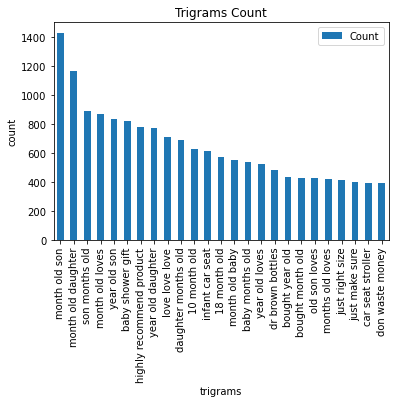

In [40]:
# barplot to represent the frequency of trigrams
df3.plot.bar()
plt.xlabel('trigrams')
plt.ylabel('count')
plt.title('Trigrams Count')

As we can see, the trigram 'month old son' has the highest frequency.